# **DEEP LEARNING**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**DEEP LEARNING - MLP**

Ingeniería en Telecomunicaciones

In [ ]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Carga de módulos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [ ]:
!nvidia-smi

Sat Mar 20 14:42:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset

MNIST dataset

60000 imágenes

Imágenes 28x28 (dígitos escritos a mano)

Labels: 0-9

En keras se carga con una sola línea de código (train & test por separado)

Datos de entrada: uint8 (0-255)

Al trabajar con valores altos puede hacer que los pesos de la red sean más díficiles de ajustar -> Normalizar

In [ ]:
# Dataset
(x_train , y_train ), (x_test , y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


Reshape a un tesor de 4 dimensiones: batch size, width, height, color channels.

No. de canales: 1 (escala de gris)

In [ ]:
x_train = x_train.reshape( (x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape( (x_test.shape[0], 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Las etiquetas están de 0-9

Para facilitar la labor de la red, se codifican con one-hot-encoding

0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Ejemplo: para el 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Modelos (variación de Hiperparámetros)

In [ ]:
# Modelo NN FC

# Hiperparámetros
batch_s, lr, num_epochs = 32, 0.01, 10
optimizerf = tf.keras.optimizers.SGD(learning_rate=lr)

# Modelo
model = Sequential([
                    Flatten(),  # 28*28=784
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
# Modelo 2 CNN

# Hiperparámetros
batch_s, lr, num_epochs = 32, 0.01, 10
optimizerf = tf.keras.optimizers.SGD(learning_rate=lr)

# Modelo
model = Sequential([
                    Conv2D(32, (3, 3),
                           activation= 'relu',
                           input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [ ]:
# Modelo 3 CNN PADDING,

# Hiperparámetros
batch_s, lr, num_epochs = 32, 0.01, 10
optimizerf = tf.keras.optimizers.SGD(learning_rate=lr)

# Modelo CNN
model = Sequential([
                    Conv2D(32, (3, 3),
                           activation= 'relu',
                           input_shape=(28, 28, 1),
                           strides=(1, 1),
                           padding="valid"),
                    MaxPooling2D(),
                    Conv2D(64, (3, 3),
                           activation= 'relu',
                           strides=(1, 1),
                           padding="valid"),
                    MaxPooling2D(),
                    Conv2D(128, (3, 3),
                           activation= 'relu',
                           strides=(1, 1),
                           padding="valid"),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(10, activation='softmax')
])

# Compilación y entrenamiento del modelo

In [ ]:
model.compile(
  optimizer=optimizerf,
  loss= 'categorical_crossentropy',
  metrics=['CategoricalAccuracy']
)

# Entrenamiento

In [ ]:
# No. imágenes = 60000
# Batch size: 32
# Número de lotes = 60000/32 = 1875

# 60000 imágenes 28 *28

history = model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=batch_s,
    validation_data=(x_test, y_test)
    )

1875/1875 [==============================] - 17s 5ms/step - loss: 0.5368 - categorical_accuracy: 0.8567 - val_loss: 0.3052 - val_categorical_accuracy: 0.9137


In [ ]:
# No. de parámetros en una capa FC:
# No. unidades capa entrada * No. unidades capa salida + No. unidades capa salida (bias)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 128)       

# Evolución del algoritmo

In [ ]:
# Gráfica de Accuracy
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Loss entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss validación')
plt.title('Loss')
plt.legend()
plt.show()

NameError: ignored

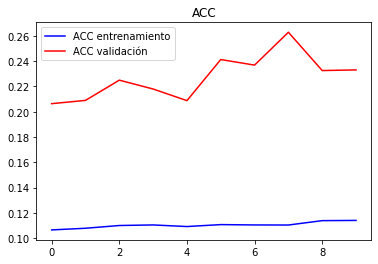

In [ ]:
# Gráfica de Accuracy
import matplotlib.pyplot as plt
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='ACC entrenamiento')
plt.plot(epochs, val_acc, 'r', label='ACC validación')
plt.title('ACC')
plt.legend()
plt.show()

# Prueba del modelo

Imagen seleccionada al azar de los datos de prueba (datos que no concoció el modelo cuando fue entrenado)

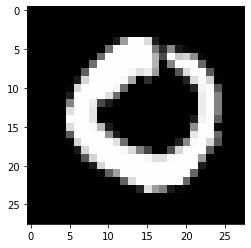

In [ ]:
image = random.choice(x_test)
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

Reshape y normalizar la imagen (como se hizo en el pre-procesamiento del dataset)

In [ ]:
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0

Predecir la clase de la imagen (el resultado se tiene que adaptar... one-hot-encoding)

In [ ]:
digit = np.argmax(model.predict(image)[0], axis=-1)
print("Prediction: ", digit)

Prediction:  0
